# Financial Planning with APIs and Simulations

This Financial Analysis tool helps the members of Credit Union by providing the following two functionalities

1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.


In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file

load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.

btc_coins = 1.2
eth_coins = 5.3

In [4]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18922600,
            "id": 1,
            "last_updated": 1641581791,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 786841626847,
                    "percent_change_1h": -0.867272009909812,
                    "percent_change_24h": -4.30396769921598,
                    "percent_change_7d": -11.7295916771507,
                    "percentage_change_1h": -0.867272009909812,
                    "percentage_change_24h": -4.30396769921598,
                    "percentage_change_7d": -11.7295916771507,
                    "price": 41656.0,
                    "volume_24h": 77866570095
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18922600,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [19]:
# Using the Python requests library, make an API call to access the current price ETH

eth_response = requests.get(eth_url).json()
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 119064785,
            "id": 1027,
            "last_updated": 1641583389,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 376389188828,
                    "percent_change_1h": -0.989081712302194,
                    "percent_change_24h": -8.5198153362823,
                    "percent_change_7d": -14.8993900919086,
                    "percentage_change_1h": -0.989081712302194,
                    "percentage_change_24h": -8.5198153362823,
                    "percentage_change_7d": -14.8993900919086,
                    "price": 3161.44,
                    "volume_24h": 24020133577
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119064785,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurr

In [21]:
# Navigating the BTC response object to access the current price of BTC

btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]
print(f"\nThe current market price of bitcoin is : ${btc_price}")


The current market price of bitcoin is : $41656.0


In [22]:
# Navigating the ETH response object to access the current price of ETH

eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]
print(f"\nThe current market price of  is Ethereum: ${eth_price}")


The current market price of  is Ethereum: $3161.44


In [23]:
# Computing the current value of the BTC holding and printing it.

btc_value = btc_coins * btc_price
print(f"\nThe current BTC Holding value in your wallet is: ${btc_value}")


The current BTC Holding value in your wallet is: $49987.2


In [24]:
# Computing the current value of the ETH holding and printing it.

eth_value = eth_coins * eth_price
print(f"\nThe current ETH Holding value in your wallet is: ${eth_value}")


The current ETH Holding value in your wallet is: $16755.632


In [25]:
# Computing the total value of the cryptocurrency wallet and printing it

total_crypto_wallet = btc_value + eth_value
print(f"\nThe Holding value in your cryptocurrency wallet is: ${total_crypto_wallet}")



The Holding value in your cryptocurrency wallet is: $66742.832


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, we’ll determine the current value of a member’s stock and bond holdings. we’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. 

1. An environment file (`.env`) is created to store the values of Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, the Alpaca `tradeapi.REST` object is created.

3. The following parameter for the API call is set:

    - `tickers`: tickers for the member’s stock and bond holdings("SPY", "AGG").

    - `timeframe`: A time frame of one day("1D").

    - `start_date` and `end_date`: Set to "2022-01-06" to get the most recent closing price.

4. we get the closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. The Response is formatted as Pandas Dataframe.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [26]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


In [28]:
# variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Alpaca tradeapi.REST object creation
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [63]:
# set tickers, timeframe start and end date.
tickers = ["SPY", "AGG"]
timeframe = "1D"
start_date = pd.Timestamp("2022-01-06" , tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-06" , tz="America/New_York").isoformat()

In [65]:
# Get most recent closing prices for SPY and AGG
portfolio_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
portfolio_df

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2022-01-06 00:00:00-05:00  112.75  112.84  112.66  112.81  6812819  467.89   

                                                             
                             high     low   close    volume  
time                                                         
2022-01-06 00:00:00-05:00  470.82  465.43  467.93  78577470

In [68]:
# Navigate portfolio_df and get AGG closing price
agg_close_price = float(portfolio_df["AGG"]["close"])
agg_close_price

112.81

In [36]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07

start_date = pd.Timestamp("2022-01-06", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-06", tz="America/New_York").isoformat()


In [35]:
# (pd.to_datetime("today") - pd.DateOffset(days=1)).

Timestamp('2022-01-06 12:23:08.140049')

In [37]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
portfolio_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Review the first 5 rows of the Alpaca DataFrame


portfolio_df.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2022-01-06 00:00:00-05:00  112.75  112.84  112.66  112.81  6812819  467.89   

                                                             
                             high     low   close    volume  
time                                                         
2022-01-06 00:00:00-05:00  470.82  465.43  467.93  78577470

In [41]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = portfolio_df["AGG"]["close"]

print(f"\nThe AGG closing price on {start_date} is \n{agg_close_price}")


The AGG closing price on 2022-01-06T00:00:00-05:00 is 
time
2022-01-06 00:00:00-05:00    112.81
Name: close, dtype: float64


In [42]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = portfolio_df["SPY"]["close"]

print(f"\nThe SPY closing price on {start_date} is \n{spy_close_price}")


The SPY closing price on 2022-01-06T00:00:00-05:00 is 
time
2022-01-06 00:00:00-05:00    467.93
Name: close, dtype: float64


In [69]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
agg_value

22562.0

In [70]:
# Navigate portfolio_df and get SPY closing price
spy_close_price = float(portfolio_df["SPY"]["close"])
spy_close_price

467.93

In [71]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
spy_value

51472.3

In [72]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value 

# Print the current balance of the stock and bond portion of the portfolio
print(f"\nThe Holding value in your Stocks and Bonds Portfolio wallet is: \n${total_stocks_bonds}\n")


The Holding value in your Stocks and Bonds Portfolio wallet is: 
$74034.3



## Calculate Total Value of Portfolio

In [79]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds

total_portfolio = total_crypto_wallet + total_stocks_bonds

total_portfolio
print(f"\nTotal Portfolio Value is (cryto wallet + stocks + bonds) : \n${total_portfolio:.2f}\n")


Total Portfolio Value is (cryto wallet + stocks + bonds) : 
$140777.13



### Evaluate the Emergency Fund

We’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. 

1. A Python list named `savings_data`  is created that contains the total value of the cryptocurrency wallets and total value of the stock and bond portions of the portfolio.

2. The `savings_data` list is used to create a Pandas DataFrame named `savings_df` with the following three parameters:

    - `savings_data`: The list that holds valuations od cryptocurry wallet and stocks/bonds portfolio.

    - `columns`: We set this as `amount`.

    - `index`: We set this to a Python list with the values of `crypto` and `stock/bond`.

3. Using `savings_df` DataFrame we plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`.

4. We determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income.

    1. A variable named `emergency_fund_value` is created and set to three times the value of the member’s `monthly_income` of $12000.

    2. We use a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, a message congratulating the member for having enough money in this fund is displayed.

        2. Else if the total portfolio value is equal to the emergency fund value, a message congratulating the member on reaching this important financial goal is displayed.

        3. Else the total portfolio is less than the emergency fund value, a message showing how many dollars away the member is from reaching the goal is displayed.


In [104]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet,total_stocks_bonds]


print("\nThe portfolio saving data value is :")
savings_data
    


The portfolio saving data value is :


[66742.832, 74034.3]

####  A Pandas DataFrame named `savings_df` is created using `savings_data` list 

In [103]:
savings_df = pd.DataFrame(savings_data,
                         columns=["amount"],
                         index=["crypto","stock/bond"])

print("\nSavings Dataframe : ")
savings_df



Savings Dataframe : 


,amount
crypto,66742.832
stock/bond,74034.300


#### Pie Chart plot of the savings Dataframe

<AxesSubplot:title={'center':'Crppto and Stock/Bond pie chart for the Portfolio'}, ylabel='amount'>

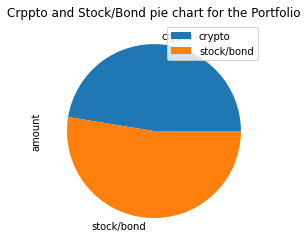

In [102]:
savings_df.plot.pie(title="Crppto and Stock/Bond pie chart for the Portfolio",
                   y="amount",
                   )

#### Determining if the current portfolio has enough to create an emergency fund as part of the member’s financial plan

In [105]:
# A variable named emergency_fund_value is created.

emergency_fund_value = 3 * monthly_income

In [107]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:

if total_portfolio > emergency_fund_value:
    print("\nCongratulations! You have enough funds in your portfolio for emergencies")
elif total_portfolio == emergency_fund_value:
    print("\nCongratulations! You just met the goal of having enough emergency fund in your Portfolio")
else:
    print(f"\nYour Portfolio does not have enough emergency fund. You still need ${emergency_fund_value - total_portfolio} to meet your emergency fund goal.")



Congratulations! You have enough funds in your portfolio for emergencies


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [ ]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
# YOUR CODE HERE
# YOUR CODE HERE

# Set number of rows to 1000 to retrieve the maximum amount of rows
# YOUR CODE HERE

In [ ]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE


# Display both the first and last five rows of the DataFrame
# YOUR CODE HERE
# YOUR CODE HERE


#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [ ]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE

# Review the simulation input data
# YOUR CODE HERE


In [ ]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE


In [ ]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

In [ ]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [ ]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE


# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = # YOUR CODE HERE
ci_upper_thirty_cumulative_return = # YOUR CODE HERE

# Print the result of your calculations
# YOUR CODE HERE


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [ ]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE

# Review the simulation input data
# YOUR CODE HERE


In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE


In [ ]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE


In [ ]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE


In [ ]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE


# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = # YOUR CODE HERE
ci_upper_ten_cumulative_return = # YOUR CODE HERE

# Print the result of your calculations
# YOUR CODE HERE


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?